# 지하철 이용객 수 예측

호텔 예약 데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 호텔 예약 취소 여부를 예측하고 결과를 분석하세요.

### 비시각화 데이터 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df_a = pd.read_csv("Metro_Traffic_Volume_Data.csv")
df_b = pd.read_csv("Days_Information_Data.csv")

# 데이터 살펴보기
print(df_a.head(3))
print(df_b.head(3))

   traffic_volume            date_time
0            5545  2012-10-02 09:00:00
1            4516  2012-10-02 10:00:00
2            4767  2012-10-02 11:00:00
   Unnamed: 0 holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0           0    None  288.28      0.0      0.0          40       Clouds   
1           1    None  289.36      0.0      0.0          75       Clouds   
2           2    None  289.58      0.0      0.0          90       Clouds   

  weather_description            date_time  year  month  day  hour  dayofweek  \
0    scattered clouds  2012-10-02 09:00:00  2012     10    2     9          1   
1       broken clouds  2012-10-02 10:00:00  2012     10    2    10          1   
2     overcast clouds  2012-10-02 11:00:00  2012     10    2    11          1   

  is_weekend season  
0          N   FALL  
1          N   FALL  
2          N   FALL  


In [2]:
# 데이터 살펴보기 : Metro_Traffic_Volume_Data.csv
df_a.head(3)

,traffic_volume,date_time
0,5545,2012-10-02 09:00:00
1,4516,2012-10-02 10:00:00
2,4767,2012-10-02 11:00:00


In [3]:
# 데이터 살펴보기 : Days_Information_Data.csv
df_b.head(3)

,Unnamed: 0,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,year,month,day,hour,dayofweek,is_weekend,season
0,0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,2012,10,2,9,1,N,FALL
1,1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,2012,10,2,10,1,N,FALL
2,2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,2012,10,2,11,1,N,FALL


In [4]:
# 중복값 확인
dup_a = df_a.duplicated().sum()
dup_b = df_b.duplicated().sum()
print(dup_a + dup_b)

# 중복값 처리
df_a.drop_duplicates(inplace=True)
df_b.drop_duplicates(inplace=True)

# 데이터프레임 병합
df = pd.merge(df_a, df_b, on='date_time', how='inner')

# 병합된 데이터 살펴보기
df.head(3)

7629


,traffic_volume,date_time,Unnamed: 0,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,year,month,day,hour,dayofweek,is_weekend,season
0,5545,2012-10-02 09:00:00,0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012,10,2,9,1,N,FALL
1,4516,2012-10-02 10:00:00,1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012,10,2,10,1,N,FALL
2,4767,2012-10-02 11:00:00,2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012,10,2,11,1,N,FALL


In [5]:
# 데이터 구조 확인
print(df.info()) 
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48204 entries, 0 to 48203
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   date_time            48204 non-null  object 
 2   Unnamed: 0           48204 non-null  int64  
 3   holiday              48204 non-null  object 
 4   temp                 48204 non-null  float64
 5   rain_1h              48204 non-null  float64
 6   snow_1h              48042 non-null  float64
 7   clouds_all           48204 non-null  int64  
 8   weather_main         48204 non-null  object 
 9   weather_description  47104 non-null  object 
 10  year                 48204 non-null  int64  
 11  month                48204 non-null  int64  
 12  day                  48204 non-null  int64  
 13  hour                 48204 non-null  int64  
 14  dayofweek            48204 non-null  int64  
 15  is_weekend           48204 non-null 

In [6]:
# 데이터 요약(통계) 확인
print(df.describe()) 

       traffic_volume    Unnamed: 0          temp       rain_1h       snow_1h  \
count    48204.000000  48204.000000  48204.000000  48204.000000  48042.000000   
mean      3259.818355  24101.500000    281.264207      0.334264      0.000223   
std       1986.860670  13915.440525     12.708268     44.789133      0.008181   
min          0.000000      0.000000    243.390000      0.000000      0.000000   
25%       1193.000000  12050.750000    272.190000      0.000000      0.000000   
50%       3380.000000  24101.500000    282.450000      0.000000      0.000000   
75%       4933.000000  36152.250000    291.806000      0.000000      0.000000   
max       7280.000000  48203.000000    310.070000   9831.300000      0.510000   

         clouds_all          year         month           day          hour  \
count  48204.000000  48204.000000  48204.000000  48204.000000  48204.000000   
mean      49.362231   2015.512426      6.506037     15.737636     11.398162   
std       39.015750      1.893211

In [7]:
# 결측치 탐색
print(df.isnull().sum()) 

traffic_volume            0
date_time                 0
Unnamed: 0                0
holiday                   0
temp                      0
rain_1h                   0
snow_1h                 162
clouds_all                0
weather_main              0
weather_description    1100
year                      0
month                     0
day                       0
hour                      0
dayofweek                 0
is_weekend                0
season                    0
dtype: int64


In [8]:
# holiday 컬럼값 및 분포 확인
print(df['holiday'])
print(df['holiday'].value_counts())

0        None
1        None
2        None
3        None
4        None
         ... 
48199    None
48200    None
48201    None
48202    None
48203    None
Name: holiday, Length: 48204, dtype: object
None                         46795
Labor Day                      157
Washingtons Birthday           136
Thanksgiving Day               135
Memorial Day                   134
Christmas Day                  131
New Years Day                  131
Independence Day               126
Veterans Day                   120
State Fair                     120
Columbus Day                   112
Martin Luther King Jr Day      107
Name: holiday, dtype: int64


### 시각화 데이터 분석

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc("font", family="NanumGothicCoding")

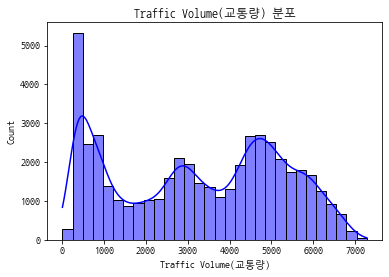

In [10]:
# 히스토그램 : 교통량(타겟변수) 분포 확인
sns.histplot(df['traffic_volume'], kde=True, bins=30, color='blue')
plt.title('Traffic Volume(교통량) 분포')
plt.xlabel('Traffic Volume(교통량)')
plt.ylabel('Count')
plt.show()


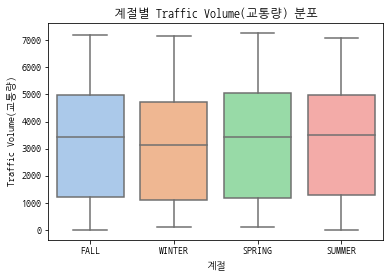

In [11]:
# 박스플롯 : 계절별 교통량 분포 확인
sns.boxplot(x='season', y='traffic_volume', data=df, palette='pastel')
plt.title('계절별 Traffic Volume(교통량) 분포')
plt.xlabel('계절')
plt.ylabel('Traffic Volume(교통량)')
plt.show()


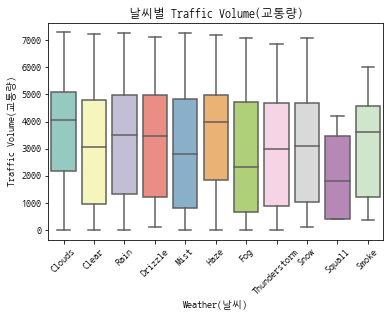

In [12]:
# 박스플롯 : 날씨 상태에 따른 교통량 분포 확인
sns.boxplot(x='weather_main', y='traffic_volume', data=df, palette='Set3')
plt.title('날씨별 Traffic Volume(교통량)')
plt.xlabel('Weather(날씨)')
plt.ylabel('Traffic Volume(교통량)')
plt.xticks(rotation=45)
plt.show()


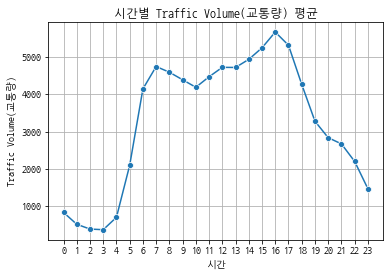

In [13]:
# 선그래프 : 시간별 평균 교통량 시각화
hourly_traffic = df.groupby('hour')['traffic_volume'].mean()

sns.lineplot(x=hourly_traffic.index, y=hourly_traffic.values, marker='o')
plt.title('시간별 Traffic Volume(교통량) 평균')
plt.xlabel('시간')
plt.ylabel('Traffic Volume(교통량)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


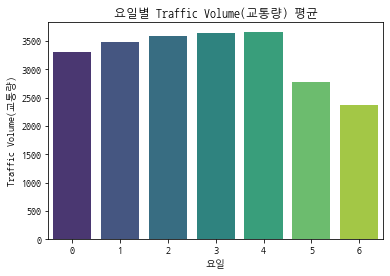

In [14]:
# 막대 그래프 : 요일별 평균 교통량 시각화
weekday_traffic = df.groupby('dayofweek')['traffic_volume'].mean()

sns.barplot(x=weekday_traffic.index, y=weekday_traffic.values, \
                                                    palette='viridis')
plt.title('요일별 Traffic Volume(교통량) 평균')
plt.xlabel('요일')
plt.ylabel('Traffic Volume(교통량)')
plt.show()


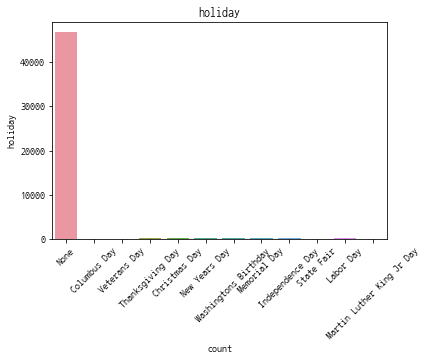

In [15]:
# 카운트플롯 : holiday 컬럼 분포 확인
sns.countplot(data=df, x='holiday')
plt.title('holiday')
plt.xlabel('count')
plt.ylabel('holiday')
plt.xticks(rotation=45)
plt.show()

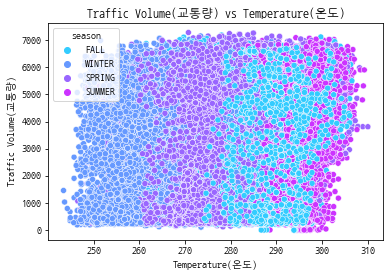

In [16]:
# 산점도 : 온도와 교통량 사이의 관계 시각화
sns.scatterplot(x='temp', y='traffic_volume', data=df, hue='season', \
                                                        palette='cool')
plt.title('Traffic Volume(교통량) vs Temperature(온도)')
plt.xlabel('Temperature(온도)')
plt.ylabel('Traffic Volume(교통량)')
plt.show()


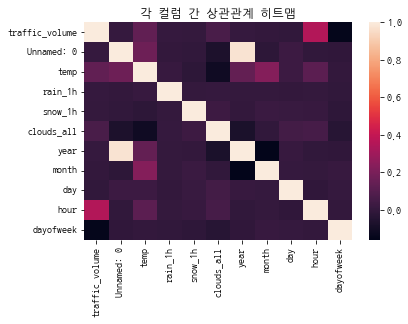

                traffic_volume  Unnamed: 0      temp   rain_1h   snow_1h  \
traffic_volume        1.000000    0.006873  0.132272  0.004714  0.000619   
Unnamed: 0            0.006873    1.000000  0.163855 -0.000410 -0.007460   
temp                  0.132272    0.163855  1.000000  0.009484 -0.020816   
rain_1h               0.004714   -0.000410  0.009484  1.000000 -0.000090   
snow_1h               0.000619   -0.007460 -0.020816 -0.000090  1.000000   
clouds_all            0.067054   -0.070616 -0.112839  0.004818  0.027946   
year                  0.004753    0.976919  0.137967  0.000442 -0.003514   
month                -0.002533   -0.022473  0.228205  0.001298  0.020399   
day                  -0.007587    0.024668  0.022912 -0.002294  0.015817   
hour                  0.352401   -0.005537  0.113479  0.003421  0.009770   
dayofweek            -0.149544   -0.009331 -0.003021 -0.006920 -0.014950   

                clouds_all      year     month       day      hour  dayofweek  
traffic

In [17]:
# 히트맵 : 수치형 변수들 간의 상관관계를 시각화
sns.heatmap(df.corr())
plt.title('각 컬럼 간 상관관계 히트맵')
plt.show()
print(df.corr())

### 데이터 전처리

In [18]:
# 파생변수 생성
df_temp = df.copy()

idx_holiday = df_temp['holiday'][df_temp['holiday']=='None'].index

# None인 경우에 Y, 아닌 경우에 N
df_temp["is_holyday"] = "N"
df_temp["is_holyday"][idx_holiday] = "Y"

# 결과 확인
print(f"파생변수 생성 후 데이터 크기: {df_temp.shape}")

파생변수 생성 후 데이터 크기: (48204, 18)


/home/iknow/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
# 불필요한 열 제거
df_del = df_temp.drop(["Unnamed: 0", "date_time", \
                           "weather_description", "holiday"], axis=1)

# 결과 확인
print(f"불필요한 변수 제거 후 데이터 크기: {df_del.shape}")

불필요한 변수 제거 후 데이터 크기: (48204, 14)


In [20]:
# 결측값 개수 확인
print("결측값 확인:")
print(df_del.isnull().sum())

# 결측값이 포함된 행 제거
df_na = df_del.dropna()
print(f"결측값 제거 후 데이터 크기: {df_na.shape}")

# 전체 결측치 개수 확인
total_na = df_na.isnull().sum().sum()
print(f"전체 결측값 개수: {total_na}")

결측값 확인:
traffic_volume      0
temp                0
rain_1h             0
snow_1h           162
clouds_all          0
weather_main        0
year                0
month               0
day                 0
hour                0
dayofweek           0
is_weekend          0
season              0
is_holyday          0
dtype: int64
결측값 제거 후 데이터 크기: (48042, 14)
전체 결측값 개수: 0


In [35]:
# Scikit-learn 활용한 원-핫 인코딩

# 범주형 변수 확인
obj_columns = df_na.dtypes[df_na.dtypes == 'object'].index
print(f"Sklearn 범주형 변수: {obj_columns.tolist()}")

print("Scikit-learn 원-핫 인코딩 전")
print(df_na)

## One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder # 라이브러리 임포트

encoder = OneHotEncoder() # 인코더 객체 불러오기
encoded_features = encoder.fit_transform(df_na[obj_columns])

# 인코딩된 데이터프레임 생성
df_encoded = pd.DataFrame(encoded_features.toarray())

# 원래 데이터프레임과 결합
df_sklearn_encoded = pd.concat([df_na.drop(columns=obj_columns), df_encoded])

print(f"Sklearn: One-Hot Encoding 후 데이터 크기: {df_sklearn_encoded.shape}")
print("Scikit-learn 원-핫 인코딩 후")
print(df_sklearn_encoded)

Sklearn 범주형 변수: ['weather_main', 'is_weekend', 'season', 'is_holyday']
Scikit-learn 원-핫 인코딩 전
       traffic_volume    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0                5545  288.28      0.0      0.0          40        Clouds   
1                4516  289.36      0.0      0.0          75        Clouds   
2                4767  289.58      0.0      0.0          90        Clouds   
3                5026  290.13      0.0      0.0          90        Clouds   
4                4918  291.14      0.0      0.0          75        Clouds   
...               ...     ...      ...      ...         ...           ...   
48199            3543  283.45      0.0      0.0          75        Clouds   
48200            2781  282.76      0.0      0.0          90        Clouds   
48201            2159  282.73      0.0      0.0          90  Thunderstorm   
48202            1450  282.09      0.0      0.0          90        Clouds   
48203             954  282.12      0.0      0.0          90

In [22]:
# Pandas를 활용한 원-핫 인코딩
obj_columns = df_na.dtypes[df_na.dtypes == 'object'].index
print(f"Pandas 범주형 변수: {obj_columns.tolist()}")

print("Pandas 원-핫 인코딩 전")
print(df_na)

df_pandas_encoded = pd.get_dummies(data=df_na, columns=obj_columns)
print(f"Pandas: One-Hot Encoding 후 데이터 크기: {df_pandas_encoded.shape}")

print("Pandas 원-핫 인코딩 후")
print(df_pandas_encoded)

Pandas 범주형 변수: ['weather_main', 'is_weekend', 'season', 'is_holyday']
Pandas 원-핫 인코딩 전
       traffic_volume    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0                5545  288.28      0.0      0.0          40        Clouds   
1                4516  289.36      0.0      0.0          75        Clouds   
2                4767  289.58      0.0      0.0          90        Clouds   
3                5026  290.13      0.0      0.0          90        Clouds   
4                4918  291.14      0.0      0.0          75        Clouds   
...               ...     ...      ...      ...         ...           ...   
48199            3543  283.45      0.0      0.0          75        Clouds   
48200            2781  282.76      0.0      0.0          90        Clouds   
48201            2159  282.73      0.0      0.0          90  Thunderstorm   
48202            1450  282.09      0.0      0.0          90        Clouds   
48203             954  282.12      0.0      0.0          90       

In [23]:
# 본 실습에서는 pandas를 이용해 인코딩한 결과를 사용합니다.
df_encoded = df_pandas_encoded.copy()

In [24]:
# X, y 분리
X = df_encoded.drop(columns=['traffic_volume'])  
y = df_encoded['traffic_volume']               

In [25]:
# 학습데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
                                        test_size=0.2, random_state=42)

print(f"X_train 크기: {X_train.shape}, X_valid 크기: {X_valid.shape}")
print(f"y_train 크기: {y_train.shape}, y_valid 크기: {y_valid.shape}")

X_train 크기: (38433, 28), X_valid 크기: (9609, 28)
y_train 크기: (38433,), y_valid 크기: (9609,)


In [26]:
## Min-Max & Standard Scaling
# 라이브러리 임포트
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print("정규화 스케일링 전")
print(X_train[['temp','clouds_all']])

# 정규화 스케일러 객체 불러오기
ms = MinMaxScaler()
X_train[['temp','clouds_all']] = ms.fit_transform(X_train[['temp','clouds_all']])
X_valid[['temp','clouds_all']] = ms.transform(X_valid[['temp','clouds_all']])

print("정규화 스케일링 후")
print(X_train[['temp','clouds_all']])


print("표준화 스케일링 전")
left_cols = X_train.columns.tolist()
left_cols.remove('temp')
left_cols.remove('clouds_all')
print(X_train[left_cols])

# 표준화 스케일러 객체 불러오기
ss = StandardScaler()
X_train[left_cols] = ss.fit_transform(X_train[left_cols])
X_valid[left_cols] = ss.transform(X_valid[left_cols])

print("표준화 스케일링 후")
print(X_train[left_cols])

정규화 스케일링 전
         temp  clouds_all
46209  296.86          40
34540  300.02          40
16351  294.02           1
20272  266.95          90
36565  293.43          20
...       ...         ...
11321  248.15           1
44869  291.72           1
38283  279.08          90
860    269.24          20
15847  301.16          40

[38433 rows x 2 columns]
정규화 스케일링 후
           temp  clouds_all
46209  0.801890        0.40
34540  0.849280        0.40
16351  0.759298        0.01
20272  0.353329        0.90
36565  0.750450        0.20
...         ...         ...
11321  0.071386        0.01
44869  0.724805        0.01
38283  0.535243        0.90
860    0.387672        0.20
15847  0.866377        0.40

[38433 rows x 2 columns]
표준화 스케일링 전
       rain_1h  snow_1h  year  month  day  hour  dayofweek  \
46209      0.0     0.00  2018      7   27    14          4   
34540      0.0     0.00  2017      6   14    20          2   
16351      0.0     0.00  2015      7    6    19          0   
20272      0.0     

        rain_1h    snow_1h      year     month       day      hour  dayofweek  \
46209 -0.127565  -0.027761  1.316194  0.141797  1.293203  0.371388   0.511662   
34540 -0.127565  -0.027761  0.787601 -0.151860 -0.196576  1.237229  -0.486774   
16351 -0.127565  -0.027761 -0.269585  0.141797 -1.113363  1.092922  -1.485210   
20272 -0.127565  15.733615 -0.269585  1.610081  1.522400 -1.648909  -0.985992   
36565 -0.127565  -0.027761  0.787601  0.435454  0.949408  0.227081   0.012444   
...         ...        ...       ...       ...       ...       ...        ...   
11321 -0.127565  -0.027761 -0.798177 -1.620144 -0.884166  1.670150  -0.486774   
44869 -0.127565  -0.027761  1.316194 -0.151860 -0.540371 -1.215988  -1.485210   
38283 -0.127565  -0.027761  0.787601  1.022767  0.949408 -0.927375  -0.985992   
860   -0.127565  -0.027761 -1.855363  1.316424 -1.457158 -0.638761   1.010879   
15847 -0.127565  -0.027761 -0.798177  0.435454 -1.686355  0.371388   0.511662   

       weather_main_Clear  

### 머신러닝 모델링

In [27]:
! pip install lightgbm

In [28]:
print(X_train.columns)

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'year', 'month', 'day',
       'hour', 'dayofweek', 'weather_main_Clear', 'weather_main_Clouds',
       'weather_main_Drizzle', 'weather_main_Fog', 'weather_main_Haze',
       'weather_main_Mist', 'weather_main_Rain', 'weather_main_Smoke',
       'weather_main_Snow', 'weather_main_Squall', 'weather_main_Thunderstorm',
       'is_weekend_N', 'is_weekend_Y', 'season_FALL', 'season_SPRING',
       'season_SUMMER', 'season_WINTER', 'is_holyday_N', 'is_holyday_Y'],
      dtype='object')


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 모델 정의
lr = LinearRegression(n_jobs=-1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
gbr = GradientBoostingRegressor(random_state=42,)
etr = ExtraTreesRegressor(random_state=42, n_jobs=-1)
xgb = XGBRegressor(random_state=42, n_jobs=-1)
lgbm = LGBMRegressor(random_state=42, n_jobs=-1)

# 모델 학습
models = [lr, dt, rf, gbr, etr, xgb, lgbm]
for model in models:
  model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 683
[LightGBM] [Info] Number of data points in the train set: 38433, number of used features: 26
[LightGBM] [Info] Start training from score 3278.210080


In [30]:
from sklearn.metrics import r2_score, mean_squared_error

columns=["lr", "dt", "rf", "gbr", "etr", "xgb","lgbm"]
index=["r2", "rmse"]

r2_scores = []
rmses = []

# 예측 및 모델 평가
models = [lr, dt, rf, gbr, etr, xgb, lgbm]
for model in models:
  pred_y = model.predict(X_valid)
  r2_scores.append(r2_score(pred_y, y_valid))
  rmses.append(mean_squared_error(pred_y, y_valid,squared=False))

data = pd.DataFrame([r2_scores, rmses], columns=columns, index=index)
data


,lr,dtr,rfr,gbr,xgbr,etr,lgbmr
r2,-0.200144,0.951119,0.972188,0.915268,0.974545,0.969113,0.971569
rmse,3904.987840,440.096523,326.003567,542.065141,312.319515,344.306814,327.397048


In [31]:
# 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 후보
parameters = {'n_estimators' : [500,1000],
              'min_samples_split' : [2,5],
              'max_depth' : [20,30]}

# GridSearchCV 객체 불러오기
cv = GridSearchCV(estimator=rf, param_grid=parameters,  cv=2)
# Grid Search 수행
cv.fit(X_train, y_train)

In [32]:
# 최적의 하이퍼파라미터 및 모델 성능 확인
print(cv.best_params_)
print(cv.best_score_)

# 최적의 하이퍼파라미터로 모델 재학습
best_model = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=30, \
                              min_samples_split=2, n_estimators=1000)
best_model.fit(X_train, y_train)
pred_y = best_model.predict(X_valid)
rmse = mean_squared_error(pred_y, y_valid,squared=False)
r2 = r2_score(pred_y, y_valid)
print(rmse,r2)

### 딥러닝 모델링

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

# 딥러닝 모델 생성
model = Sequential()
model.add(Dense(units=64, activation='relu', \
                        input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

# 콜백 함수 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, \
                                           restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', \
                                monitor='val_loss', save_best_only=True)

# 모델 학습
history = model.fit(
    X_train, y_train, 
    validation_data=(X_valid, y_valid),
    epochs=50, batch_size=16,
    callbacks = [early_stopping, model_checkpoint],
    verbose=1)

# 모델 평가
loss, mae, mse = model.evaluate(X_valid, y_valid)
print("딥러닝 모델 성능:", mse)

2025-01-09 19:01:11.711380: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:/usr/local/cuda-11.6/lib64:
2025-01-09 19:01:11.711456: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:/usr/local/cuda-11.6/lib64:
2025-01-09 19:01:11.711468: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2025-01-09 19:01:12.130759: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________
Train on 38433 samples, validate on 9609 samples
Epoch 1/10
38433/38433 [==============================] - 7s 176us/sample - loss: 5215314.2820 - mae: 1874.3707 - mse: 5215313.0000 - val_loss: 40846040.5096 - val_mae: 1643.3737 - val_mse: 40846076.0000

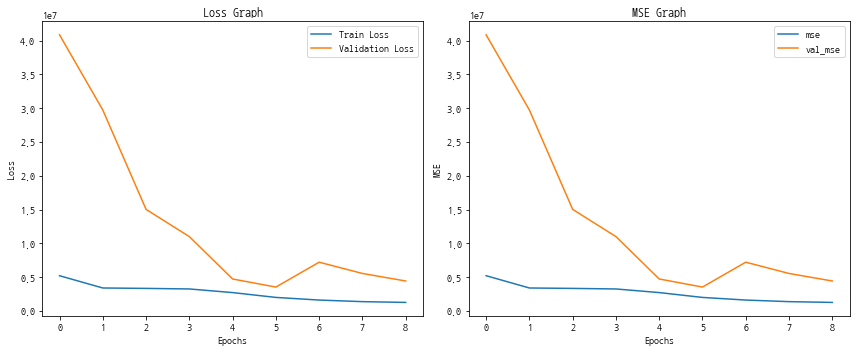

In [34]:
# 학습 그래프 그리기
plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MSE 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('MAE Graph')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()
